In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from datetime import datetime # timestamp formating
import matplotlib.pyplot as plt # data visualization

In [2]:
# Read csv file as a dataframe
df = pd.read_csv('/kaggle/input/technical-assessment/dataset_for_technical_assessment.csv')

In [3]:
df.head()

,Description,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
0,2016-01-01 00:00:00,0.008133,0.805288,0.934119,0.182838,0.282637,0.612302,0.218844,0.036615,0.695623,0.286383
1,2016-01-01 00:05:00,0.008964,0.799772,0.934014,0.180689,0.281720,0.611908,0.220869,0.037616,0.693026,0.296014
2,2016-01-01 00:10:00,0.008906,0.809219,0.934031,0.181439,0.282202,0.610927,0.222187,0.034264,0.692654,0.289457
3,2016-01-01 00:15:00,0.008469,0.804602,0.934367,0.182620,0.282305,0.612801,0.221935,0.034894,0.693397,0.290959
4,2016-01-01 00:20:00,0.006882,0.799026,0.934884,0.180871,0.281051,0.610566,0.218883,0.038596,0.690928,0.287653


In [4]:
# Convert index to datetime format
df['datetime'] = pd.to_datetime(df['Description'], format='%Y-%m-%d %H:%M:%S')
df.set_index('datetime', inplace=True)

In [5]:
# check for duplicates
is_duplicate = df.index.duplicated().any()

# print the result
if is_duplicate:
    print("There are duplicate timestamps in the time series data")
else:
    print("There are no duplicate timestamps in the time series data")

There are duplicate timestamps in the time series data


In [6]:
# find duplicate timestamps
duplicates = df[df.index.duplicated()]

In [7]:
duplicates.index.min(), duplicates.index.max()

(Timestamp('2016-11-06 02:05:00'), Timestamp('2016-11-06 03:00:00'))

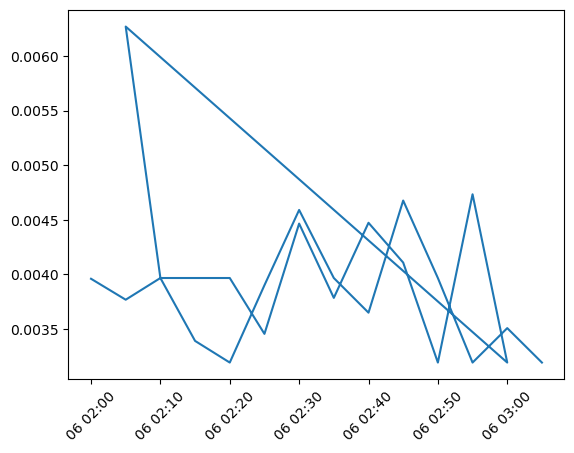

In [8]:
# set the date range for the plot
start_date = '2016-11-06 02:00:00'
end_date = '2016-11-06 03:05:00'

# select the rows within the date range
subset = df.loc[start_date:end_date]

# plot the selected subset of the DataFrame
plt.plot(subset.index, subset['y2'])
plt.xticks(rotation=45)
plt.show()

In [9]:
# Drop the duplicate timestamps from the timeseries
df = df.drop_duplicates(subset=['Description'], keep="first")

In [10]:
# Drop the column as it is no longer needed
df.drop(columns=['Description'],inplace = True)

In [11]:
# Check for missing values
print(df.isna().sum())

y1    74
y2    74
x1    74
x2     0
x3     0
x4    70
x5    74
x6    74
x7     0
x8     0
dtype: int64


In [12]:
df.shape

(157800, 10)

In [13]:
df.tail()

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2017-07-01 23:35:00,0.007516,0.725023,0.948420,0.627338,0.632173,0.631040,0.261269,0.042838,0.683385,0.231942
2017-07-01 23:40:00,0.007683,0.722261,0.949335,0.633572,0.639500,0.628861,0.260363,0.046228,0.683139,0.227148
2017-07-01 23:45:00,0.008906,0.728316,0.948450,0.639345,0.645229,0.632574,0.262826,0.043451,0.690426,0.236186
2017-07-01 23:50:00,0.009094,0.733958,0.946910,0.640376,0.646174,0.634153,0.269820,0.045295,0.693872,0.242765
2017-07-01 23:55:00,0.008133,0.732525,0.946880,0.640178,0.645763,0.632321,0.264719,0.044135,0.691252,0.242006


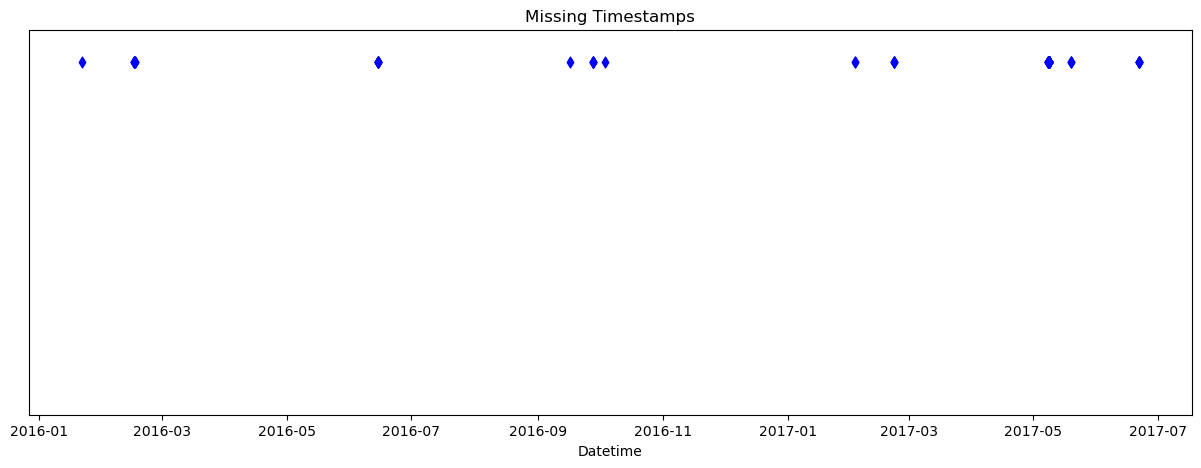

In [14]:
# Create a binary column indicating whether each timestamp is missing or not
df['is_missing'] = df['y1'].isna().astype(int)


# Create a plot showing the missing timestamps
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df[df['is_missing']==1]['is_missing'].index, df[df['is_missing']==1]['is_missing'],
           marker='d', s=30, color = 'blue')
ax.set_ylim(-0.1, 1.1)
ax.set_title('Missing Timestamps')
ax.set_xlabel('Datetime')
ax.set_yticks([])
plt.show()

Find if timestamps are missing in the timeseries.

In [15]:
df.index.min(),df.index.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2017-07-01 23:55:00'))

In [16]:
# Create a new index with all timestamps
new_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='5min')

In [17]:
# Get number of missing timestamps
len(set(new_index) - set(df.index))

24

In [18]:
# Print missing timestamps
set(new_index) - set(df.index)

{Timestamp('2016-03-13 02:05:00', freq='5T'),
 Timestamp('2016-03-13 02:10:00', freq='5T'),
 Timestamp('2016-03-13 02:15:00', freq='5T'),
 Timestamp('2016-03-13 02:20:00', freq='5T'),
 Timestamp('2016-03-13 02:25:00', freq='5T'),
 Timestamp('2016-03-13 02:30:00', freq='5T'),
 Timestamp('2016-03-13 02:35:00', freq='5T'),
 Timestamp('2016-03-13 02:40:00', freq='5T'),
 Timestamp('2016-03-13 02:45:00', freq='5T'),
 Timestamp('2016-03-13 02:50:00', freq='5T'),
 Timestamp('2016-03-13 02:55:00', freq='5T'),
 Timestamp('2016-03-13 03:00:00', freq='5T'),
 Timestamp('2017-03-12 02:05:00', freq='5T'),
 Timestamp('2017-03-12 02:10:00', freq='5T'),
 Timestamp('2017-03-12 02:15:00', freq='5T'),
 Timestamp('2017-03-12 02:20:00', freq='5T'),
 Timestamp('2017-03-12 02:25:00', freq='5T'),
 Timestamp('2017-03-12 02:30:00', freq='5T'),
 Timestamp('2017-03-12 02:35:00', freq='5T'),
 Timestamp('2017-03-12 02:40:00', freq='5T'),
 Timestamp('2017-03-12 02:45:00', freq='5T'),
 Timestamp('2017-03-12 02:50:00', 

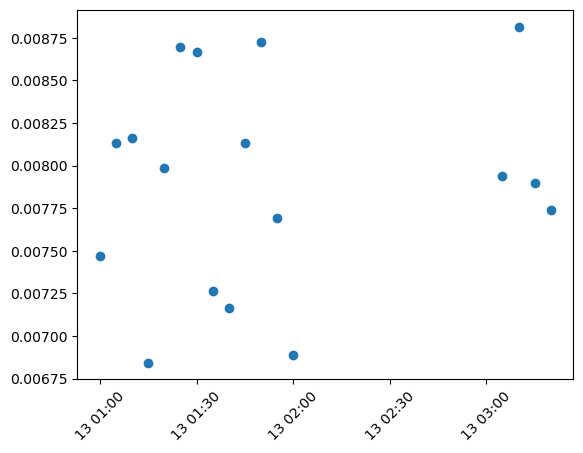

In [19]:
# set the date range for the plot that included missing timestamps
start_date = '2016-03-13 01:00:00'
end_date = '2016-03-13 03:20:00'

# select the rows within the date range
subset = df.loc[start_date:end_date]

# plot the selected subset of the DataFrame
plt.scatter(subset.index, subset['y1'])
plt.xticks(rotation=45)
plt.show()

> There are no observation for timestamps between 2:00 - 3:00 on this day

In [20]:
# Reindex the DataFrame with the new index
df = df.reindex(new_index)

In [21]:
# Check for missing values
print(df.isna().sum())

y1            98
y2            98
x1            98
x2            24
x3            24
x4            94
x5            98
x6            98
x7            24
x8            24
is_missing    24
dtype: int64


In [22]:
# Count the missing values in the dataset that needs to be filled
missing_count = df.isna().sum().sum()
total_count = np.product(df.shape)
missing_percent = missing_count / total_count * 100
print(f"The dataset has {missing_count} missing values out of {total_count} total values ({missing_percent:.2f}%).")

The dataset has 704 missing values out of 1736064 total values (0.04%).


In [23]:
# Interpolate the missing values 
df.interpolate(method='linear', inplace=True)

> *Interpolation methods can reduce bias: ffill() and bfill() propagate the most recently observed value forward or backward to fill missing values. This can introduce bias into the data if the most recently observed value is not representative of the overall pattern of the data. Interpolation methods can provide a more balanced estimate of missing values based on the overall pattern of the data.*

In [24]:
# Check if anything is still Nan?
print(df.isna().sum())

y1            0
y2            0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
is_missing    0
dtype: int64


In [25]:
df.shape

(157824, 11)

In [26]:
# Drop the extra columns
df.drop(columns =['is_missing'], axis = 1,inplace = True)

In [27]:
df.shape

(157824, 10)

In [28]:
# Save as a pandas pickle to avoid any changes in the data types
df.to_pickle('complete_df.pkl')

In [31]:
# Save as a csv for visualizing the data
df.to_csv('complete_df.csv', index = True)

In [29]:
df.describe()

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
count,157824.000000,157824.000000,157824.000000,157824.000000,157824.000000,157824.000000,157824.000000,157824.000000,157824.000000,157824.000000
mean,0.263444,0.491859,0.926383,0.394721,0.429180,0.622467,0.248980,0.045137,0.662132,0.246652
std,0.333447,0.383782,0.080297,0.192875,0.189480,0.077725,0.042041,0.094512,0.069174,0.086715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000272,0.000000,0.000000,0.100328,0.049736
25%,0.008133,0.004324,0.930394,0.213695,0.250277,0.609007,0.228150,0.028404,0.645606,0.226274
50%,0.008906,0.775743,0.935799,0.402448,0.461793,0.626668,0.251670,0.035821,0.676399,0.251988
75%,0.677681,0.791204,0.938374,0.549451,0.585648,0.640240,0.266414,0.042721,0.690239,0.272233
max,1.000000,1.000000,1.000000,0.957686,0.974826,0.982159,0.406178,1.000000,0.914145,1.000000


> Note: Ignored train test split and imputed value on the entire dataset. It can cause the issue of leakage, but for simplicity ignored it in this case.
<!-- 

X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, shuffle=False) -->